In [ ]:
# Uncomment following line to install on colab
#! pip install qeds

In [2]:
import random
import numpy as np
import pandas as pd
import qeds
import matplotlib.pyplot as plt

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

## Exercise: Cohort Analysis using Shopify Data

The `qeds` library includes routines to simulate data sets in the
format of common sources

One of these sources is [Shopify](https://www.shopify.com/) — an
e-commerce platform used by many retail companies for online sales

The code below will simulate a fairly large data set that has the
properties of a order-detail report from Shopify

We’ll first look at the data, and then describe the exercise

In [ ]:
# Set the "randomness" seeds
random.seed(42)
np.random.seed(42)

orders = qeds.data.shopify.simulate_orders(500000)
orders.info()

orders.head()

We define a customer’s cohort as the month in which a customer placed
their first order and the customer type as an indicator of whether this
was their first order or a returning order.

We now describe the *want* for the exercise, which we ask you to
complete.

**Want**: Compute the monthly total number of orders, total sales, and
total quantity separated by customer cohort and customer type.

Read that carefully one more time…

### Extended Exercise

Using the reshape and `groupby` tools you have learned, apply the want
operator described above.

See below for advice on how to proceed.

When you are finished, you should have something that looks like this:

![https://datascience.quantecon.org/assets/_static/groupby_files/groupby_cohort_analysis_exercise_output.png](https://datascience.quantecon.org/assets/_static/groupby_files/groupby_cohort_analysis_exercise_output.png)  
Two notes on the table above:

1. 
  <dl style='margin: 20px 0;'>
  <dt>Your actual output will be much bigger. This is just to give you an</dt>
  <dd>
  idea of what it might look like.  
  </dd>
  
  </dl>
  
1. 
  <dl style='margin: 20px 0;'>
  <dt>The numbers you produce should actually be the same as what are</dt>
  <dd>
  included in this table… Index into your answer and compare what you
  have with this table to verify your progress.  
  </dd>
  
  </dl>
  


Now, how to do it?

There is more than one way to code this, but here are some suggested
steps.

1. Convert the `Day` column to have a `datetime` `dtype` instead
  of object (Hint: use the `pd.to_datetime` function).  
1. Add a new column that specifies the date associated with each
  customer’s `"First-time"` order.  
  - Hint 1: You can do this with a combination of `groupby` and
    `join`.  
  - Hint 2: `customer_type` is always one of `Returning` and
    `First-time`.  
  - Hint 3: Some customers don’t have a
    `customer_type == "First-time"` entry. You will need to set the
    value for these users to some date that precedes the dates in the
    sample. After adding valid data back into `orders` DataFrame,
    you can identify which customers don’t have a `"First-Time"`
    entry by checking for missing data in the new column.  
1. You’ll need to group by 3 things.  
1. You can apply one of the built-in aggregation functions to the GroupBy.  
1. After doing the aggregation, you’ll need to use your reshaping skills to
  move things to the right place in rows and columns.  


Good luck!

In [160]:
C = np.arange(1, 7, dtype=float)
C[[3, 5]] = np.nan
df = pd.DataFrame({
    "A" : [1, 1, 1, 2, 2, 2],
    "B" : [1, 1, 2, 2, 1, 1],
    "C": C,
})
gbA = df.groupby("A")

## Exercises


<a id='exerciselist-0'></a>
**Exercise 1**

Look closely at the output of the cells below.

How did pandas compute the sum of `gbA`? What happened to the `NaN`
entries in column `C`?

Write your thoughts.

**Using A as an index, pandas computes a sum of columns B and C for every unique value of A.
In this example 2 columns were created with 2 rows of sums for when A is 1 and when A is 2.
If the value of a cell is NaN it is ignored in the final calculation.
When A is 1, B is 1+1+2 and C is 1.0+2.0+3.0
When A is 2, B is 2+1+1, and C is just 5.0 since it is the only value that is a number**

Hint: try `gbA.count()` or `gbA.mean()` if you can't decide what
happened to the `NaN`.

In [10]:
df

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0
3,2,2,NaN
4,2,1,5.0
5,2,1,NaN


In [14]:
gbA.sum()

,B,C
A,,
1,4,6.0
2,4,5.0


([*back to text*](https://datascience.quantecon.org/#exercise-0))

**Exercise 2**

Use introspection (tab completion) to see what other aggregations are
defined for GroupBy objects.

Pick three and evaluate them in the cells below.

Does the output of each of these commands have the same features as the
output of `gbA.sum()` from above? If not, what is different?

**In regards to applying the aggregation to every column for every unique index of A and ignoring NaN
in calculations, all the below aggregations are consistent with GroupBy.sum()**

In [15]:
# method 1
gbA.max()

,B,C
A,,
1,2,3.0
2,2,5.0


In [16]:
# method 2
gbA.median()

,B,C
A,,
1,1,2.0
2,1,5.0


In [17]:
# method 3
gbA.min()

,B,C
A,,
1,1,1.0
2,1,5.0


([*back to text*](https://datascience.quantecon.org/#exercise-1))

**Exercise 3**

> This exercise has a few steps:

1. Write a function that, given a DataFrame, computes each entry's
deviation from the mean of its column.
2. Apply the function to `gbA`.
3. With your neighbor describe what the index and and columns are? Where
are the group keys (the `A` column)?

**The custom function applies in the same fashion to every cell and group as the other aggregations in Exercise 2.
However, it applies to all of Column A as well since the aggregation is applied across the entire dataframe, and the deviation of the groupby value from itself is 0. Pandas assumedly defaults back to a numbered index in the case of being unable to group by the designated column.**

4. Determine the correct way to add these results back into `df` as
new columns. (Hint: remember the merge lecture)

In [161]:
# write function here
def deviation(df):
    col_mean = df.mean()
    
    return abs(df - col_mean)

# apply function here, dataframe returned
gb_dev = gbA.apply(deviation)
gb_dev

,A,B,C
0,0.0,0.333333,1.0
1,0.0,0.333333,0.0
2,0.0,0.666667,1.0
3,0.0,0.666667,NaN
4,0.0,0.333333,0.0
5,0.0,0.333333,NaN


In [162]:
#Manually dropping and merging after since merging existing columns with different values does not want to play nice
gb_dev_cp = gb_dev.drop(labels="A", axis=1)
df_cp = df.drop(labels=["B", "C"], axis=1)

In [169]:
# add output of function as new columns to df here...

df_cp.join(gb_dev_cp)

,A,B,C
0,1,0.333333,1.0
1,1,0.333333,0.0
2,1,0.666667,1.0
3,2,0.666667,NaN
4,2,0.333333,0.0
5,2,0.333333,NaN




<dl style='margin: 20px 0;'>
<dt>Note that if the group keys</dt>
<dd>
remained in the index as the `.apply`'s output, the merge/join step would
have been complicated.

</dd>

</dl>

([*back to text*](https://datascience.quantecon.org/#exercise-2))

**Exercise 4**

Think about what is shown in the the plots above.

Answer questions like:

- Which type of delay was the most common?  
**Pulling from the graphs of sum of total minutes of delay per carrier, late aircrafts were the most common delay (contributed most minutes to total delay)**

- Which one caused the largest average delay?
**Pulling from the graphs of mean of delay per carrier, late aircrafts also caused the largest average delay**

- Does that vary by airline?  
**From the graph of mean delays, airlines like HA, UA, VX, NK, and EV had other causes that led to higher average delay time, so these results do vary by airline**

Write your thoughts.

([*back to text*](https://datascience.quantecon.org/#exercise-3))

**Exercise 5**

Verify that we wrote the functions properly by setting the arguments to
appropriate values to replicate the plots from above.

In [181]:
#Pulled code from case study
air_dec = qeds.load("airline_performance_dec16")

delay_cols = [
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay'
]

def mean_delay_plot(df, freq, figsize=(10, 8)):
    """
    Make a bar chart of average flight delays for each carrier at
    a given frequency.
    """
    mean_delays = (
        df
        .groupby([pd.Grouper(key="Date", freq=freq), "Carrier"])
        ["ArrDelay"]               # extract one column
        .mean()                    # take average
        .unstack(level="Carrier")  # Flip carrier up as column names
    )

    # plot
    axs = mean_delays.plot.bar(
        figsize=figsize, subplots=True, legend=False, sharex=True,
        sharey=True, layout=(4, 3), grid=False
    )

    # tweak spacing between subplots and x-axis labels
    axs[0, 0].get_figure().tight_layout()
    for ax in axs[-1, :]:
        ax.set_xticklabels(mean_delays.index.strftime("%a, %b. %d'"))

    # return the axes in case we want to further tweak the plot outside the function
    return axs


def delay_type_plot(df, start, end):
    """
    Make bar charts for total minutes, average minutes, and number of
    occurrences for each delay type, for all flights that were scheduled
    between `start` date and `end` date
    """
    sub_df = df.loc[
        (df["Date"] >= start) & (df["Date"] <= end)
    ]

    def positive(df):
        return (df > 0).sum()

    aggs = sub_df.groupby("Carrier")[delay_cols].agg(["sum", "mean", positive])

    reshaped = aggs.stack().T.swaplevel(axis=1).sort_index(axis=1)

    for agg in ["mean", "sum", "positive"]:
        axs = reshaped[agg].plot(
            kind="bar", subplots=True, layout=(4, 3), figsize=(10, 8), legend=False,
            sharex=True, sharey=True
        )
        fig = axs[0, 0].get_figure()
        fig.suptitle(agg)
#         fig.tight_layout();

array([[<AxesSubplot:title={'center':'AA'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'AS'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'B6'}, xlabel='Date'>],
       [<AxesSubplot:title={'center':'DL'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'EV'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'F9'}, xlabel='Date'>],
       [<AxesSubplot:title={'center':'HA'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'NK'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'OO'}, xlabel='Date'>],
       [<AxesSubplot:title={'center':'UA'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'VX'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'WN'}, xlabel='Date'>]], dtype=object)

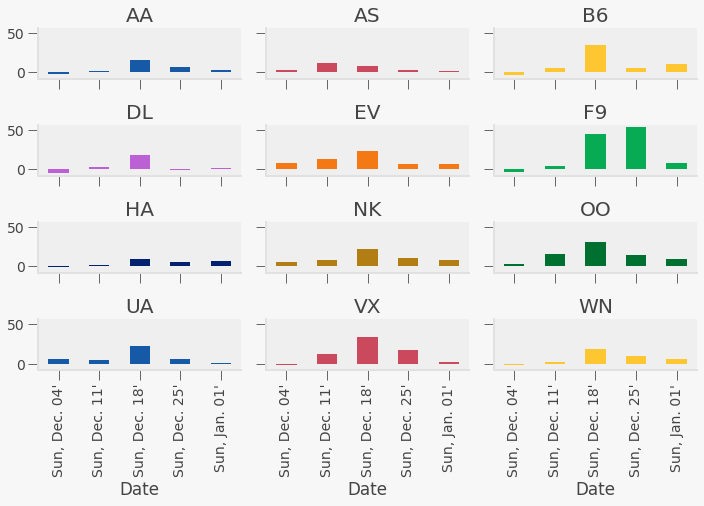

In [180]:
# call mean_delay_plot here, should be weekly data
mean_delay_plot(air_dec, "W", figsize=(10,8))

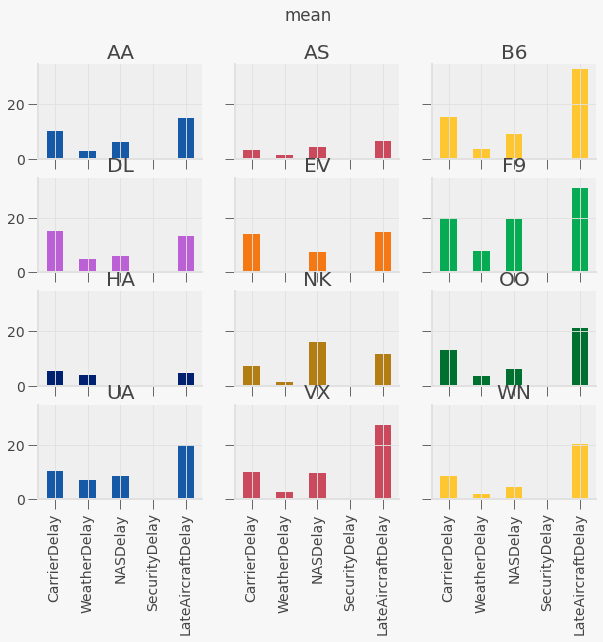

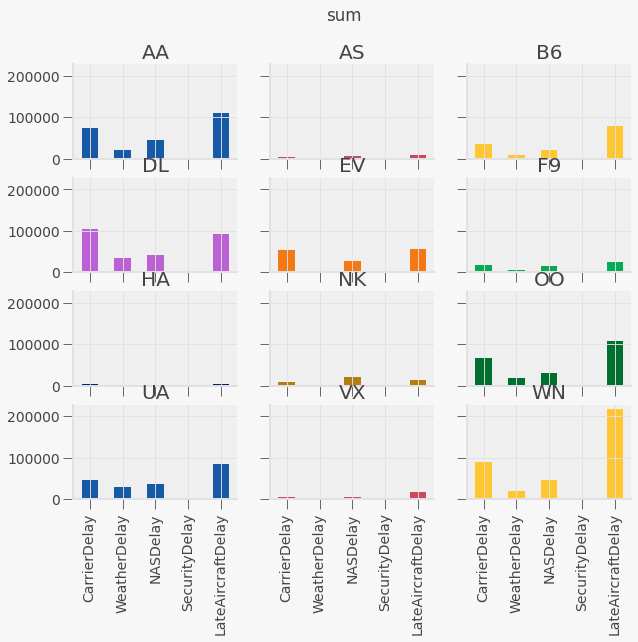

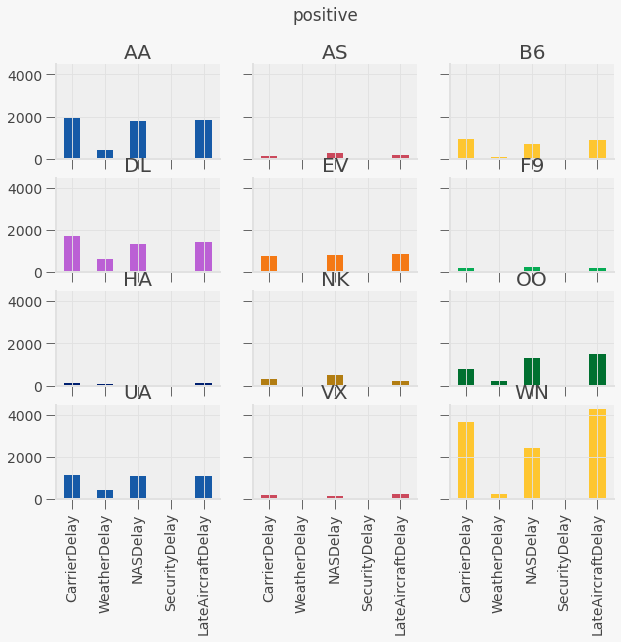

In [179]:
# call delay_type_plot here, weekly data
delay_type_plot(air_dec, "12-16-16", "12-18-16")

([*back to text*](https://datascience.quantecon.org/#exercise-4))